In [38]:
from lea_utils import SimulatorLEA
from lea_utils import norm_values
import numpy as np
import pandas as pd

In [39]:
#Intancia do simulador
simulador=SimulatorLEA()
filepath="./dados_experimentais/Dados_BCSLEA_20210818.mat"
#Carregar dados experimentais
intervalo_horas=(0,7) #Janela de simulação em horas escolhida com base no histórico de dados
simulador.getLEAdata(filepath,intervalo_horas)


0
 File loaded ./dados_experimentais/Dados_BCSLEA_20210818.mat


In [40]:
fk,zc,pman,pres=simulador.BCS_EXP.get_exo_values() # Armazenamento dos valores das exógenas
x1,x2,x3=simulador.BCS_EXP.get_ss_values() # Armazenamento dos valores dos estados

maxtime = fk.shape[0]
nsim=maxtime

In [41]:
x1=np.reshape(x1,(maxtime,1))
x2=np.reshape(x2,(maxtime,1))
x3=np.reshape(x3,(maxtime,1))
fk=np.reshape(fk,(maxtime,1))
zc=np.reshape(zc,(maxtime,1))
pman=np.reshape(pman,(maxtime,1))
pres=np.reshape(pres,(maxtime,1))

In [42]:
x0,xc.shape

(array([[1.00000000e+05],
        [2.00000000e+05],
        [2.77777778e-05]]),
 (3, 1))

3


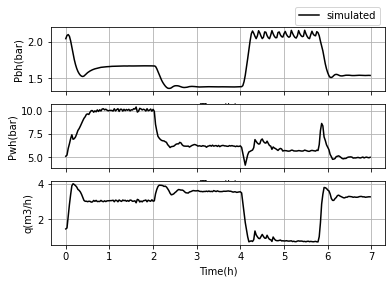

In [43]:
xc,x0=norm_values()
xc=xc.T;x0=x0.T
x1n=(x1-x0[0])/xc[0]
x2n=(x2-x0[1])/xc[1]
x3n=(x3-x0[2])/xc[2]
tempo=simulador.BCS_EXP.tempo_hora
x=[x1,x2,x3]
print(len(x))
Fig_states=simulador.plotLEA.plot_states([x],tempo)


Scaling external inputs

$q_{ch}=Cc\cdot \sqrt{k_n}(\underbrace{Z_c/100}_{Z_n})\sqrt{\underbrace{\frac{|P_{wh}-p_m|}{k_n}}}_{P_{mn}}, ~ q_r=PI\cdot10^5\cdot\underbrace{10^{-5}(P_r-P_{bh})}_{P_{rn}}, ~ H=CH\cdot H0\left(\underbrace{\frac{f_q}{f_0}}_{f_n}\right)^2$

Kn escolhido para tornar Pmn entre 0 e 1

In [46]:
u=np.hstack([fk.reshape(len(fk),1),zc.reshape(len(fk),1),pman.reshape(len(fk),1),pres.reshape(len(fk),1)])
Cc=2e-5;
kn=(25*1e5)
pmn=(x2-pman)/kn; #Cc=Cc/sqrt(kn)
un=np.hstack([fk.reshape(len(fk),1)/60,zc.reshape(len(fk),1)/100, pmn, pres])
print(u.shape,print(x1.shape))
df = pd.DataFrame(np.hstack([un,x1,x2,x3]),columns=['f','z','pm','pr','pbh','pwh','q'])

(252, 1)
(252, 4) None


In [48]:
#checking scaling
qch = (zc/100.0)*Cc * np.sqrt(kn)*np.sqrt(np.abs(pmn));
print(qch.max(),qch.min())
qch = (zc/100.0)*Cc * np.sqrt(np.abs(x2-pman));
print(qch.max(),qch.min())

0.0074922224 0.0014354885
0.0074922233 0.0014354886


In [ ]:
label = ['fn',r'z_cn', "pmn"];
scale